In [1]:
!pip install mlxtend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Read the data

In [2]:
datatr= pd.read_csv('DUMD_train.csv')

In [3]:
datatr

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,High
319,0.85,0.82,0.66,0.83,0.83,High
320,0.56,0.60,0.77,0.13,0.32,Low
321,0.66,0.68,0.81,0.57,0.57,Medium


In [4]:
datates = pd.read_csv('DUMD_test.csv')

In [5]:
datates

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,Medium
76,0.288,0.310,0.790,0.23,0.24,Low
77,0.260,0.260,0.310,0.26,0.13,Very Low
78,0.990,0.490,0.070,0.70,0.69,High


In [6]:
datatr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     323 non-null    float64
 1   SCG     323 non-null    float64
 2   STR     323 non-null    float64
 3   LPR     323 non-null    float64
 4   PEG     323 non-null    float64
 5   UNS     323 non-null    object 
dtypes: float64(5), object(1)
memory usage: 15.3+ KB


There is no nun values, the data is clean 

In [7]:
datatr.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [8]:
datatr.describe()

,STG,SCG,STR,LPR,PEG
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.355954,0.356598,0.460062,0.433533,0.457183
std,0.215300,0.215211,0.245813,0.259842,0.267962
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195000,0.200000,0.265000,0.240000,0.250000
50%,0.310000,0.300000,0.460000,0.350000,0.450000
75%,0.490000,0.510000,0.670000,0.650000,0.660000
max,0.910000,0.900000,0.950000,0.990000,0.990000


## Visualize the distribution

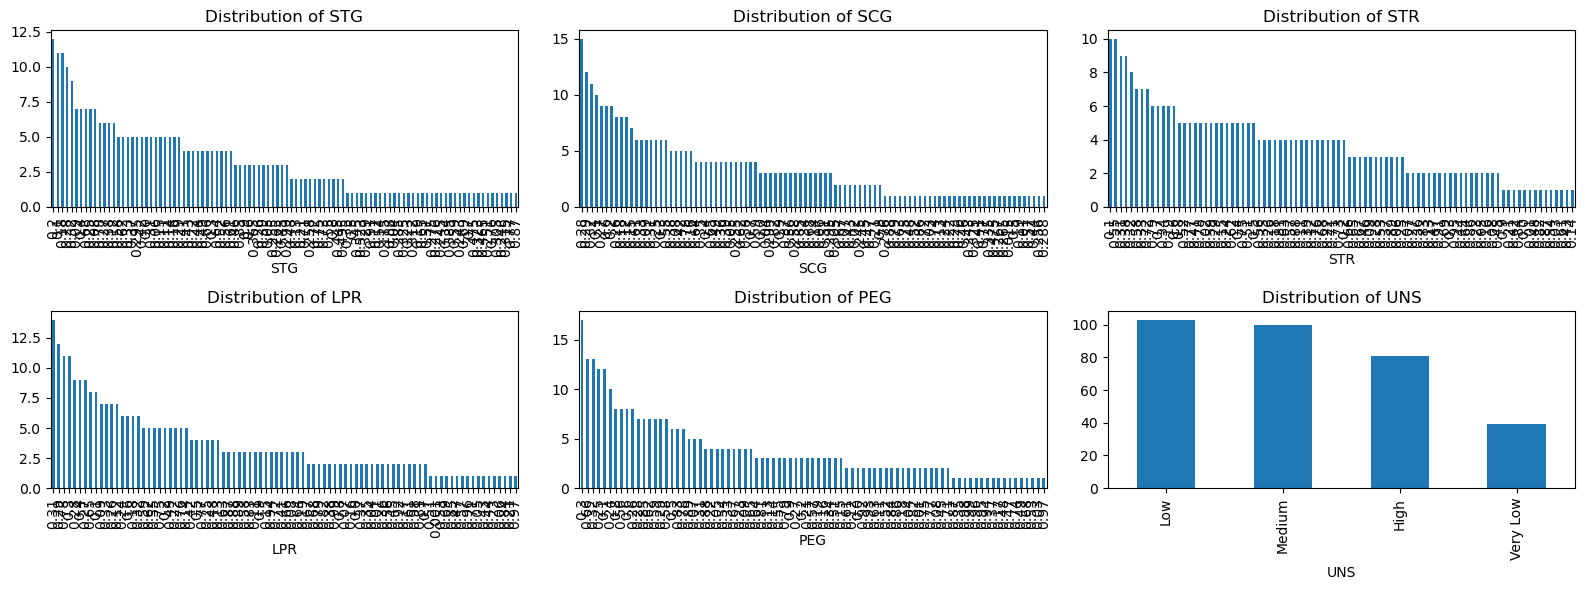

In [9]:
import matplotlib.pyplot as plt

# Visualize the distribution
# Create a figure and subplots based on the number of columns
fig, axs = plt.subplots(2, 3, figsize=(16, 6))

# Correct column names (remove leading spaces)
columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']

# Iterate over the columns and create the distribution plots
for i, col in enumerate(columns):
    ax = axs[i//3, i%3]  # Adjust indexing based on the number of subplots
    datatr[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()


c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='STG', ylabel='Count'>

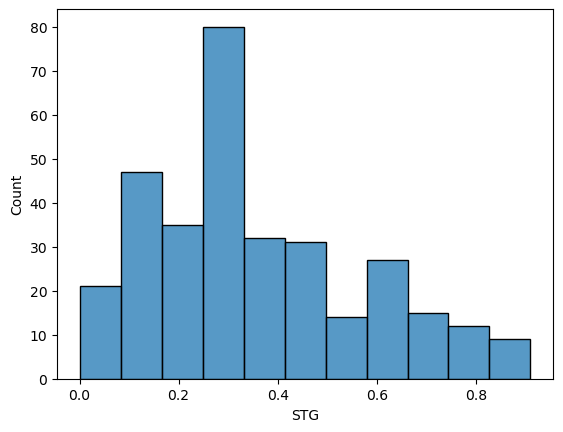

In [10]:
sns.histplot(x="STG" , data= datatr)

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SCG', ylabel='Count'>

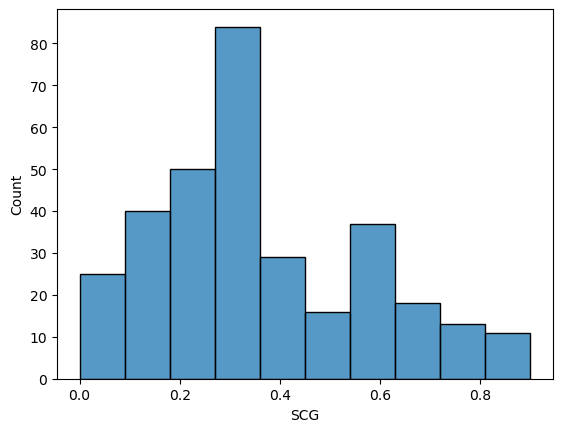

In [11]:
sns.histplot(x="SCG" , data= datatr)

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='STR', ylabel='Count'>

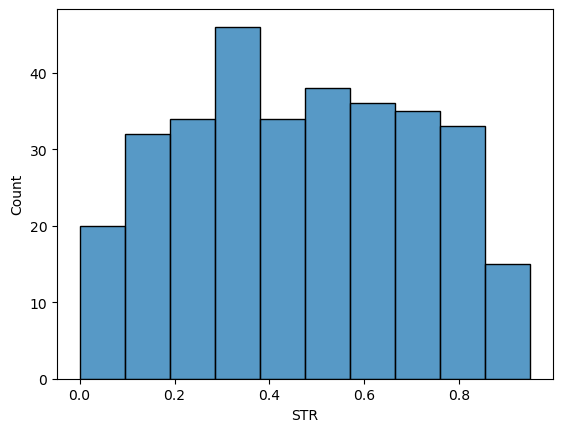

In [12]:
sns.histplot(x="STR" , data= datatr)

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LPR', ylabel='Count'>

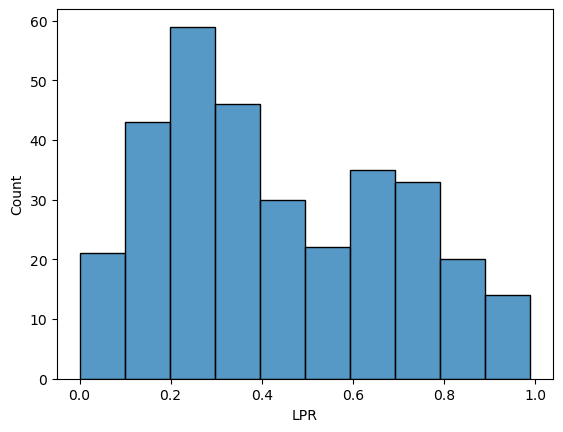

In [13]:
sns.histplot(x="LPR" , data= datatr)

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PEG', ylabel='Count'>

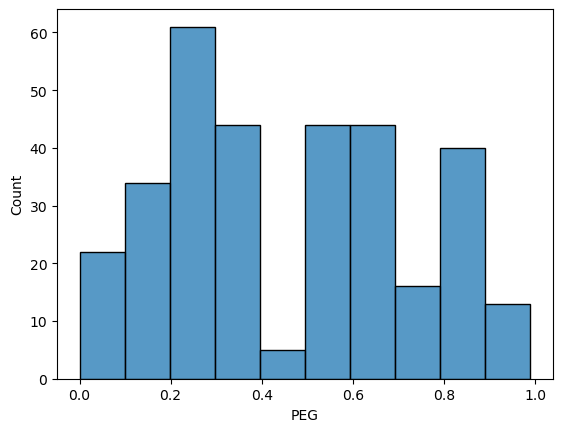

In [14]:
sns.histplot(x="PEG" , data= datatr)

## Visualize the distribution with the target classes 

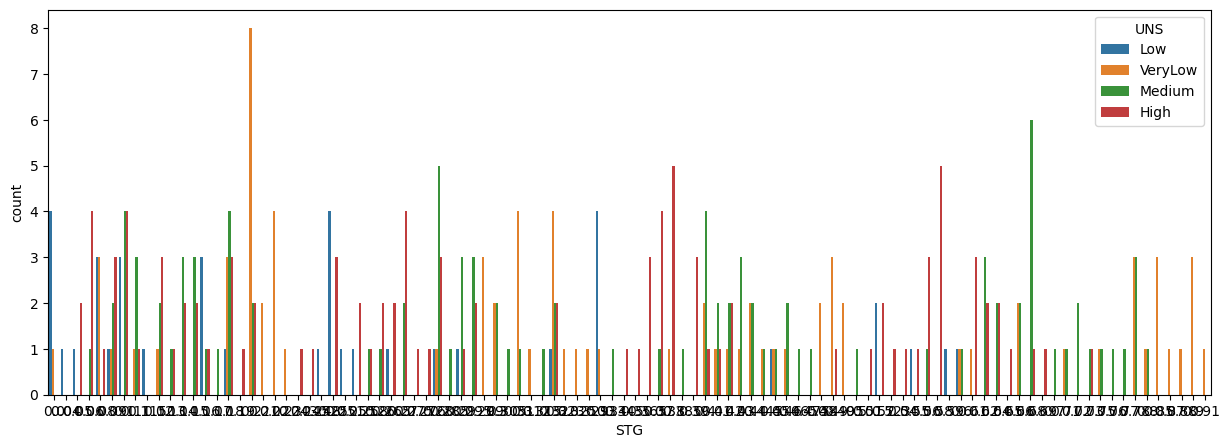

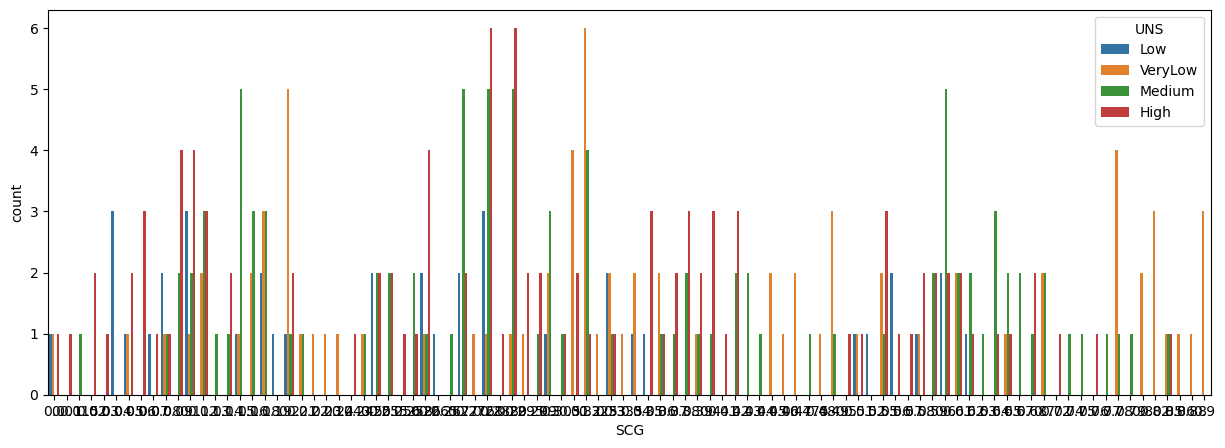

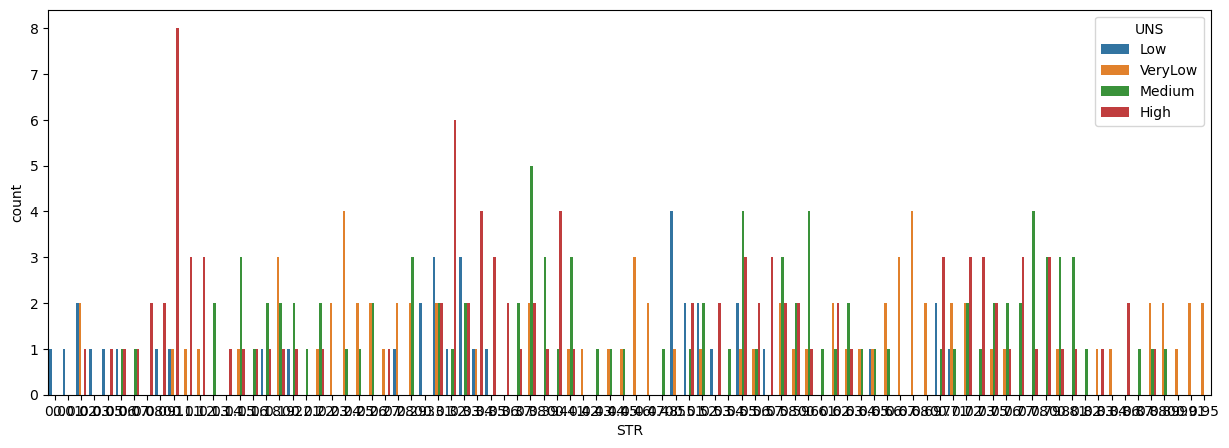

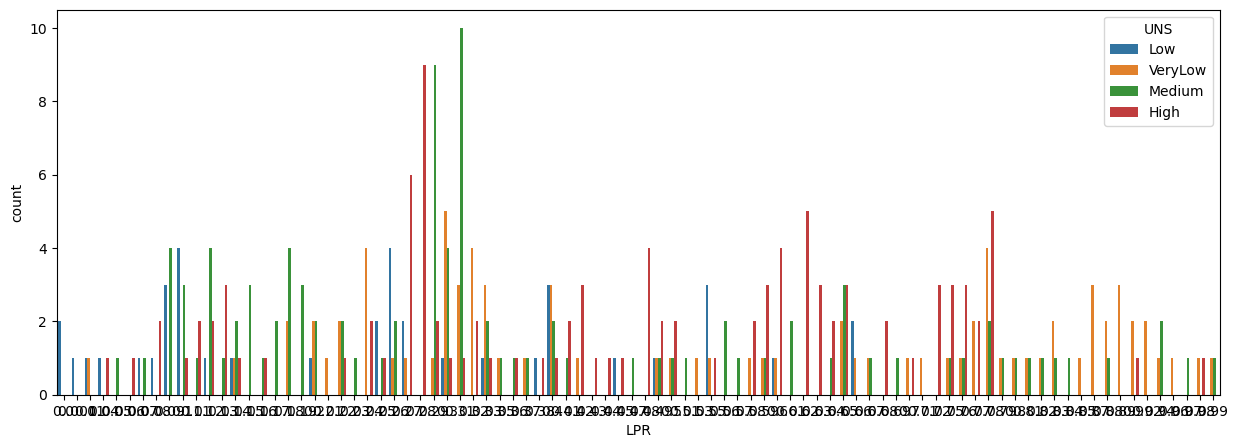

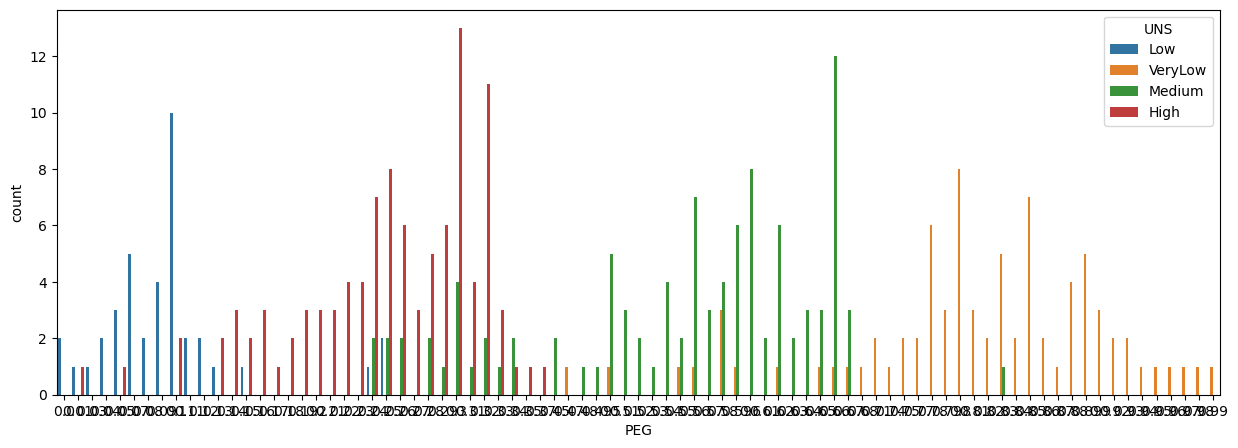

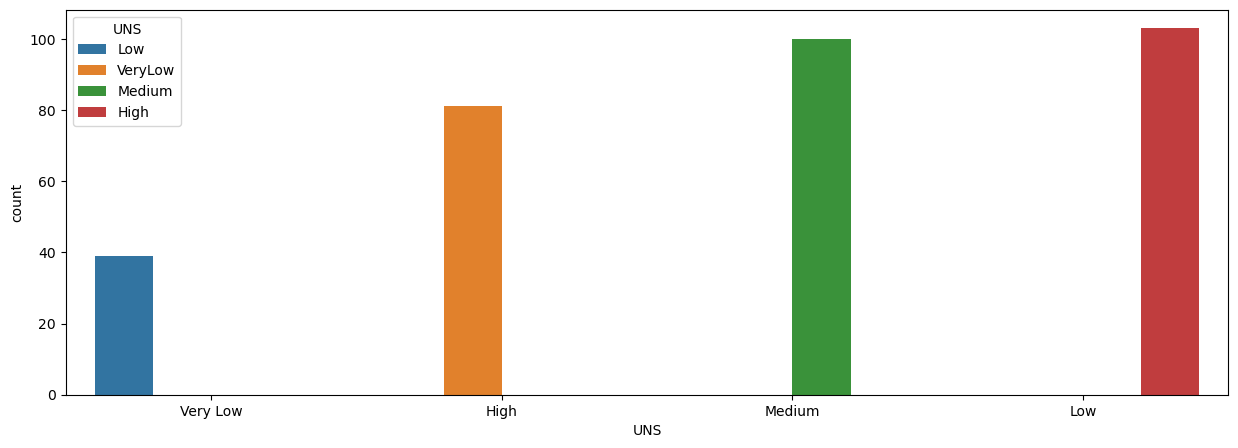

In [15]:
columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']
for feature in columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=datatr, x=feature, hue="UNS")
    plt.legend(title="UNS", labels=["Low", "VeryLow","Medium",'High'])
    plt.show()

## Visualize the outliers in data

<Axes: >

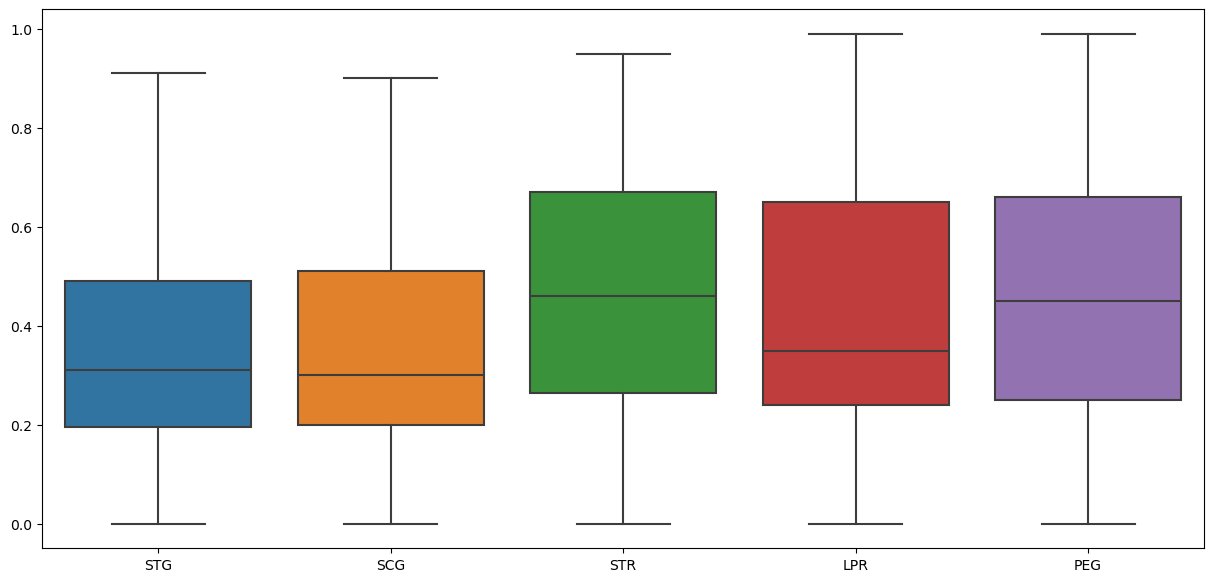

In [16]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(datatr)

There is no outliers

In [17]:
datatr

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,High
319,0.85,0.82,0.66,0.83,0.83,High
320,0.56,0.60,0.77,0.13,0.32,Low
321,0.66,0.68,0.81,0.57,0.57,Medium


In [18]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
datatr['UNS'] = label_encoder.fit_transform(datatr['UNS'])


In [19]:
datatr

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,0
319,0.85,0.82,0.66,0.83,0.83,0
320,0.56,0.60,0.77,0.13,0.32,1
321,0.66,0.68,0.81,0.57,0.57,2


In [20]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
datates['UNS'] = label_encoder.fit_transform(datates['UNS'])

In [21]:
datates

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,2
76,0.288,0.310,0.790,0.23,0.24,1
77,0.260,0.260,0.310,0.26,0.13,3
78,0.990,0.490,0.070,0.70,0.69,0


## Data selection of 2 Features 


In [22]:
corrleationMatrix = datatr.corr()
corrleationMatrix['UNS']

STG   -0.163634
SCG   -0.152212
STR   -0.108481
LPR   -0.350565
PEG   -0.577067
UNS    1.000000
Name: UNS, dtype: float64

In [23]:
datatr.drop(columns=["STG","SCG","STR"],inplace=True)

In [24]:
datates

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,2
76,0.288,0.310,0.790,0.23,0.24,1
77,0.260,0.260,0.310,0.26,0.13,3
78,0.990,0.490,0.070,0.70,0.69,0


<Axes: >

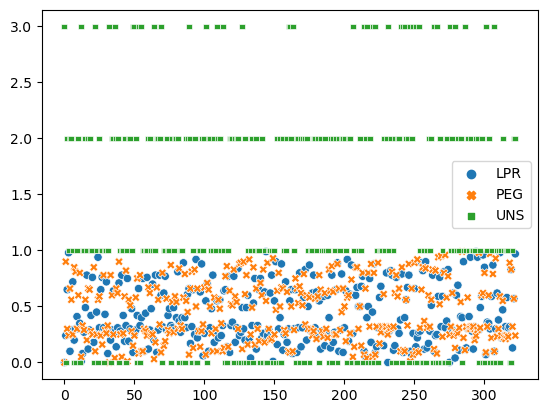

In [25]:
sns.scatterplot(datatr)

In [26]:
datates.drop(columns=["STG","SCG","STR"],inplace=True)

<Axes: >

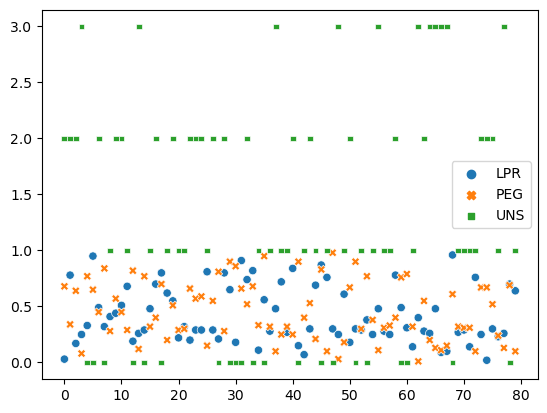

In [27]:
sns.scatterplot(datates)

## Why those Two features 
Because the corr of the two features is -0.350565 &&  -0.577067 which is far away from zero which mean they are related to the target

## SVM

In [28]:
xtrain = datatr.drop(['UNS'],axis=1)
ytrain = datatr['UNS']
xtest = datates.drop(['UNS'],axis=1)
ytest = datates['UNS']

Confusion Matrix:
[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  1  0 10]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



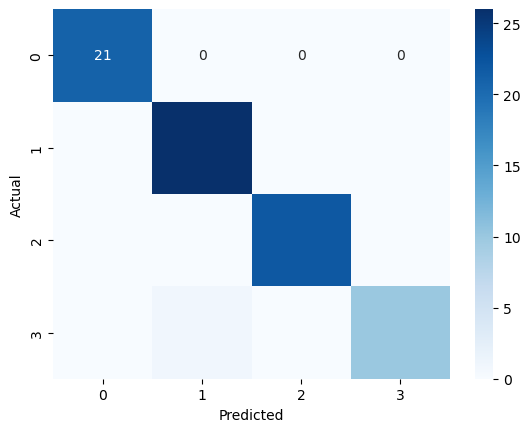

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(xtrain,ytrain)


# make predictions on test set
y_pred=svc.predict(xtest)

# Evaluate the clasiffication model
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))
print("\nClassification Report:\n")
print(classification_report(ytest, y_pred))
cm =confusion_matrix(ytest, y_pred)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
# Train the logistic regression model
model = LogisticRegression(max_iter=200) # build
model.fit(xtrain, ytrain) # train or learn

LogisticRegression(max_iter=200)

In [32]:
# Make predictions
y_pred = model.predict(xtest)
y_pred_proba = model.predict_proba(xtest)[:,1]

In [33]:
y_pred

array([2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       3, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1])

In [34]:
y_pred_proba

array([0.12988053, 0.45889809, 0.15242433, 0.50286748, 0.05861459,
       0.05652418, 0.33098106, 0.03457511, 0.50707645, 0.19362296,
       0.32958911, 0.52913173, 0.04808484, 0.51063806, 0.06154508,
       0.48298243, 0.37947731, 0.0488764 , 0.60625318, 0.24857706,
       0.45523089, 0.47393316, 0.13491508, 0.20745825, 0.18799473,
       0.67371873, 0.22769235, 0.05053317, 0.54145781, 0.01089363,
       0.03607261, 0.05599437, 0.20395635, 0.05586432, 0.40302641,
       0.00830112, 0.45135545, 0.60546459, 0.57556464, 0.44924739,
       0.57870129, 0.02753936, 0.35349947, 0.24808158, 0.61024694,
       0.0128906 , 0.69269656, 0.01084984, 0.49373883, 0.61700035,
       0.12889069, 0.0217748 , 0.46720041, 0.05488895, 0.39861886,
       0.60391943, 0.45829193, 0.43801416, 0.36748694, 0.05056643,
       0.05178109, 0.41778718, 0.5671658 , 0.22824017, 0.50226431,
       0.59981218, 0.42748384, 0.43737022, 0.07792046, 0.44924739,
       0.46049239, 0.42279915, 0.69269656, 0.12363581, 0.13705

In [35]:
# Evaluate the clasiffication model
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))
print("\nClassification Report:\n")
print(classification_report(ytest, y_pred))

Confusion Matrix:
[[21  0  0  0]
 [ 0 25  1  0]
 [ 1  5 16  0]
 [ 0 10  0  1]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.62      0.96      0.76        26
           2       0.94      0.73      0.82        22
           3       1.00      0.09      0.17        11

    accuracy                           0.79        80
   macro avg       0.88      0.69      0.68        80
weighted avg       0.85      0.79      0.75        80



## OVR SVM

In [36]:
datatr= pd.read_csv('DUMD_train.csv')
datates = pd.read_csv('DUMD_test.csv')
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report

xtrain = datatr[['PEG', 'LPR']]
ytrain = datatr['UNS']
xtest = datates[['PEG', 'LPR']]
ytest = datates['UNS']


In [37]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [38]:
Oencode=OneHotEncoder()

yb =Oencode.fit_transform(datatr["UNS"].values.reshape(-1,1))
ytrain = pd.DataFrame(yb.toarray())
ybt =Oencode.fit_transform(datates["UNS"].values.reshape(-1,1))
ytest = pd.DataFrame(ybt.toarray())

ytrain

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
318,1.0,0.0,0.0,0.0
319,1.0,0.0,0.0,0.0
320,0.0,1.0,0.0,0.0
321,0.0,0.0,1.0,0.0


In [39]:
svm_0,svm_1,svm_3,svm2=SVC(probability=True),SVC(probability=True),SVC(probability=True),SVC(probability=True)
ypred_list=[]
y_proba_l=[]

1.0


c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        59
         1.0       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion matrix 
 [[59  0]
 [ 0 21]]


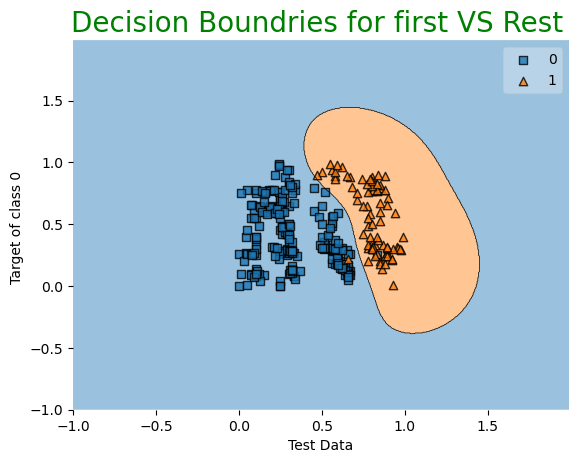

In [66]:
svm_0.fit(xtrain,ytrain[0])
ypred=svm_0.predict(xtest)
ypred_list.append(ypred)
y_prob=svm_0.predict_proba(xtest)[:,1].reshape(-1,1)
y_proba_l.append(y_prob)
print(accuracy_score(ytest[0],ypred))

#plot 
xnp=xtrain.to_numpy()
plt.title('Decision Boundries for first VS Rest ',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel(f'Target of class 0 ')
ynp=ytrain[0].to_numpy()
ynp=ynp.astype(int)
plot_decision_regions(xnp, ynp,clf= svm_0,legend=1)
print("classification Report \n", classification_report(ytest[0] , ypred))
print("Confusion matrix \n", confusion_matrix( ytest[0] , ypred))


Accuracy =  0.975


c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        54
         1.0       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

Confusion matrix 
 [[52  2]
 [ 0 26]]


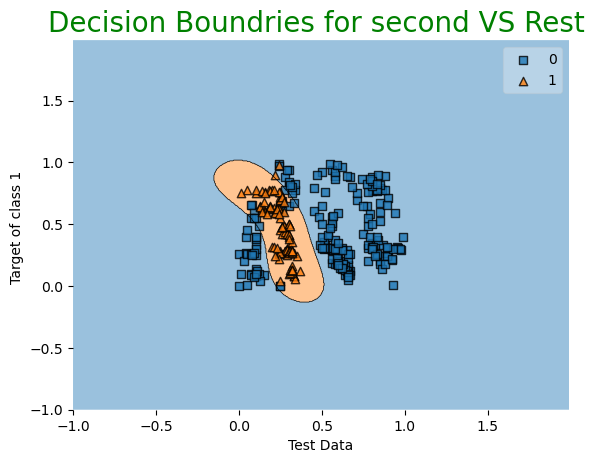

In [65]:
svm_1.fit(xtrain,ytrain[1])
ypred=svm_1.predict(xtest)
ypred_list.append(ypred)
y_prob=svm_1.predict_proba(xtest)[:,1].reshape(-1,1)
y_proba_l.append(y_prob)
print("Accuracy = " ,accuracy_score(ytest[1],ypred))

#plot 
xnp=xtrain.to_numpy()
plt.title('Decision Boundries for second VS Rest ',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel(f'Target of class 1 ')
ynp=ytrain[1].to_numpy()
ynp=ynp.astype(int)
plot_decision_regions(xnp, ynp,clf= svm_1,legend=1)
print("classification Report \n", classification_report(ytest[1] , ypred))
print("Confusion matrix \n", confusion_matrix( ytest[1] , ypred))


1.0


c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


classification Report 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion matrix 
 [[58  0]
 [ 0 22]]


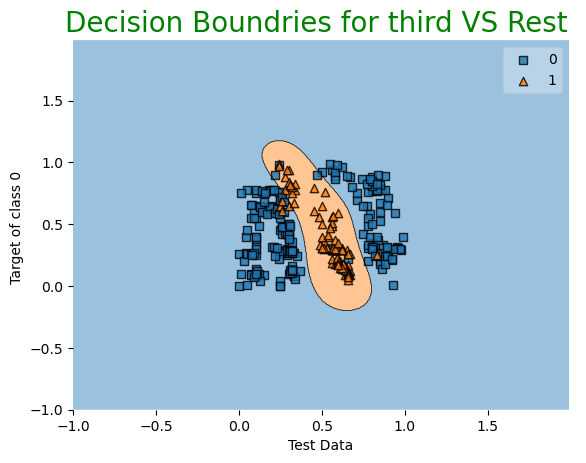

In [64]:
svm2.fit(xtrain,ytrain[2])
ypred=svm2.predict(xtest)
ypred_list.append(ypred)
y_prob=svm2.predict_proba(xtest)[:,1].reshape(-1,1)
y_proba_l.append(y_prob)
print(accuracy_score(ytest[2],ypred))

#plot 
xnp=xtrain.to_numpy()
plt.title('Decision Boundries for third VS Rest ',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel(f'Target of class 0 ')
ynp=ytrain[2].to_numpy()
ynp=ynp.astype(int)
plot_decision_regions(xnp, ynp,clf= svm2,legend=1)
print("classification Report \n ", classification_report(ytest[2] , ypred))
print("Confusion matrix \n", confusion_matrix( ytest[2] , ypred))


0.9875


c:\Users\mohamed osama\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


classification Report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        69
         1.0       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80

Confusion matrix 
 [[69  0]
 [ 1 10]]


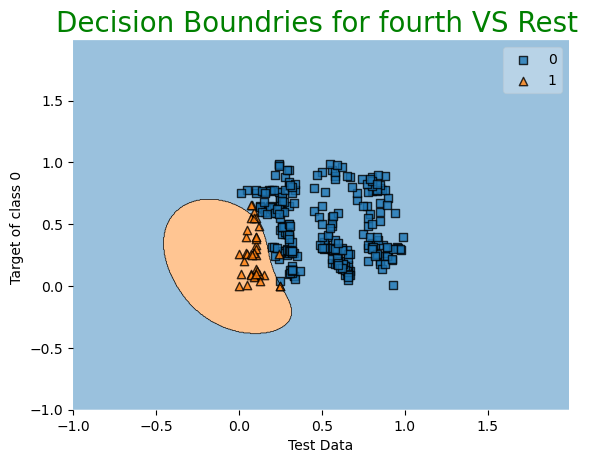

In [63]:
svm_3.fit(xtrain,ytrain[3])
ypred=svm_3.predict(xtest)
ypred_list.append(ypred)
y_prob=svm_3.predict_proba(xtest)[:,1].reshape(-1,1)
y_proba_l.append(y_prob)
print(accuracy_score(ytest[3],ypred))

#plot 
xnp=xtrain.to_numpy()
plt.title('Decision Boundries for fourth VS Rest ',fontsize=20,loc='center',color='green')
plt.xlabel('Test Data')
plt.ylabel(f'Target of class 0 ')
ynp=ytrain[3].to_numpy()
ynp=ynp.astype(int)
plot_decision_regions(xnp, ynp,clf= svm_3,legend=1)
print("classification Report \n", classification_report(ytest[3] , ypred))
print("Confusion matrix \n", confusion_matrix( ytest[3] , ypred))


In [44]:
def Arg_max(x):
  argmax=[]
  l=len(x)
  svm=[svm_0,svm_1,svm_3,svm2]
  mx=[]
  for i in range(l):
    result=[]
    for model in svm:


      result.append(model.predict_proba(x.iloc[[i]])[:,1].reshape(-1,1)[0])
    argmax.append(result.index(max(result)))
  return argmax

In [45]:
Arg_max(xtest)

[3,
 3,
 3,
 2,
 0,
 0,
 3,
 0,
 1,
 3,
 3,
 1,
 0,
 2,
 0,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 2,
 1,
 3,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 0,
 1]